### Reserch Question 1

Exploratory Data Analysis (EDA) - Before working on our research questions, we should provide meaningful statistical summaries through visualizations and tabular tools to understand your data.

### Data Analysis
Firstly we need to import libraries that we are going to work with

In [4]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr``
import warnings
warnings.filterwarnings("ignore")

In [5]:
authors_set = "lighter_authors.json"
books_set = "lighter_books.json"

Since my system does not have enough memory to load the authors json file, I have to use chunks so that my system RAM does not load completely.
Loading the Authors Dataset

In [6]:
#Setting up the Chunk size
chunksize = 5000
#We need to create an empty list to store chunks
authors = pd.DataFrame()
# Then we have to loop each chunk and append it to the result dataframe
for chunk in pd.read_json(authors_set, lines=True, chunksize=chunksize):
    # Concatenate selected chunk to the list
    authors = pd.concat([authors, chunk], ignore_index=True)

In [7]:
authors.head(5)

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,https://images.gr-assets.com/authors/159137433...,"Douglas Noël Adams was an English author, comi...",19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,https://images.gr-assets.com/authors/157859752...,"William McGuire ""Bill"" Bryson, OBE, FRS was bo...",16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,https://images.gr-assets.com/authors/141145711...,"Jude Fisher is the pseudonym for <a href=""http...",60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,https://images.gr-assets.com/authors/127051738...,James Hamilton-Paterson's work has been transl...,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,https://images.gr-assets.com/authors/133175379...,Mark Andrew Watson (born 13 February 1980) is ...,179


As we can see, there are columns that cannot be used in our data analysis because they are generally useless. We need to drop such columns.

In [8]:
authors.drop(["about","image_url"], axis = 1, inplace = True)

In [9]:
authors.head(10)

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,179
5,436635,3.78,26193,"[1959512, 132919, 1652564, 4708346, 2536975, 3...","[53835, 5246, 17728, 212525, 26950, 269528, 85...",1001,16,Edith Wharton,female,3179
6,46,4.59,21,"[4420, 21232, 1057034, 21226, 1057032, 21228, ...","[49, 20035, 1070349, 20029, 1070347, 20031, 20...",36,17,Luther Butler,male,10
7,503435,3.79,34364,"[1158125, 241811, 6815, 3182664, 6813, 7000800...","[50, 141372, 2915, 141371, 2913, 6795756, 6694...",226,18,Gary Paulsen,male,2636
8,6392,3.66,631,"[6398423, 21178, 1931660, 13273040, 189082, 24...","[6217775, 19979, 19983, 8325686, 195506, 19551...",26,20,Dale Peck,,99
9,100211,4.00,3650,"[1705297, 7294256, 507563, 21108, 21109, 21115...","[1708127, 7044446, 519655, 19909, 19910, 19916...",99,23,Angela Knight,,963


In [10]:
authors.describe()

,ratings_count,average_rating,text_reviews_count,works_count,id,fans_count
count,3.517670e+05,351767.000000,351767.000000,3.517670e+05,3.517670e+05,351767.000000
mean,4.770586e+03,3.651194,330.993243,2.593714e+01,7.751861e+06,111.615731
std,9.769395e+04,1.211482,3857.539191,3.066083e+03,6.578409e+06,2661.018139
min,-4.100000e+01,-31.000000,0.000000,0.000000e+00,4.000000e+00,-33.000000
25%,6.000000e+00,3.600000,1.000000,2.000000e+00,1.535315e+06,1.000000
50%,3.900000e+01,3.950000,8.000000,6.000000e+00,6.470396e+06,4.000000
75%,3.100000e+02,4.250000,53.000000,1.500000e+01,1.434041e+07,20.000000
max,2.700375e+07,5.000000,608956.000000,1.775176e+06,2.124802e+07,766035.000000


### Authors Dataset Cleaning

In [11]:
print(authors.shape)

(351767, 10)


As we can see from the description table of the authors dataset we have a negative values of the "ratings_count", "average_rating", "fans_count", this cannot be possible, because of that i decided to filter this values out. We cannot drop this values because we will miss the meaningful data.

In [12]:
authors.loc[:, "ratings_count"] = authors["ratings_count"].apply(lambda x: np.nan if x <0 else x)
authors.loc[:, "average_rating"] = authors["average_rating"].apply(lambda x: np.nan if x<0 else x)
authors.loc[:, "fans_count"] = authors["fans_count"].apply(lambda x: np.nan if x<0 else x)
authors.describe()

,ratings_count,average_rating,text_reviews_count,works_count,id,fans_count
count,3.517630e+05,351766.000000,351767.000000,3.517670e+05,3.517670e+05,351744.000000
mean,4.770641e+03,3.651293,330.993243,2.593714e+01,7.751861e+06,111.623416
std,9.769451e+04,1.210074,3857.539191,3.066083e+03,6.578409e+06,2661.104967
min,0.000000e+00,0.000000,0.000000,0.000000e+00,4.000000e+00,0.000000
25%,6.000000e+00,3.600000,1.000000,2.000000e+00,1.535315e+06,1.000000
50%,3.900000e+01,3.950000,8.000000,6.000000e+00,6.470396e+06,4.000000
75%,3.100000e+02,4.250000,53.000000,1.500000e+01,1.434041e+07,20.000000
max,2.700375e+07,5.000000,608956.000000,1.775176e+06,2.124802e+07,766035.000000


As we can see now we dont have any kind of negative values in 'rating_count', 'average_rating' and 'fans_count', this makes more sense.

I did notice that there are cases in our data where the lenght of the "work_ids" do not match with the value in 'works_count'.

In [13]:
number_of_missmatches = authors[authors.apply(lambda x: len(x.work_ids)!=x.works_count, axis=1)].shape[0]
print("The number of missmatching rows:", number_of_missmatches)
print(authors.shape)

The number of missmatching rows: 444
(351767, 10)


This is the number of rows where "works_count" doesn't match the count of "work_ids".

In [14]:
authors = authors.loc[authors.apply(lambda row:len(row['work_ids'])== row['works_count'], axis = 1)]
print(authors.shape)

(351323, 10)


In [15]:
authors.head()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,fans_count
0,2862064.0,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,19826.0
1,1417316.0,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,16144.0
2,56159.0,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,60.0
3,3302.0,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,72.0
4,7979.0,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,179.0


As we can see, i dropped all missmatching rows from our dataset. The difference in rows is exactly - 444

I did notice that there are authors who are missing information about their gender, for instance: Dale Peck, Angelia Knight. So we need to replace them with the 'Not Specified' value.

In [16]:
authors['gender'] = authors['gender'].replace('', 'Non Specified')
authors['gender'].unique()

array(['male', 'female', 'Non Specified', 'genderfluid', 'genderqueer',
       'transgender female', 'apache  Helicopter', 'Fiction', 'none',
       'Unknown', 'space dust', 'Non-Binary Transgender', 'non-binary',
       'Non-binary', 'Not specified', 'Neutral', 'Trans non binary guy',
       'nonbinary', 'Wife & Hubby Duo', 'Femme', 'NB', 'agender',
       'Nonbinary', 'Adrogynous', 'Genderfluid', 'them', 'Bigender',
       'Trans', 'other', 'Non-binary Woman', 'fluid', 'Non-Binary',
       'Learned', 'I exist', 'Male (FtM)', 'gender fluid', 'Bot',
       'Questioning', 'Agender', 'Genderless',
       'Somewhere on the continuum', 'Transgender', 'Pizza and Pretzels',
       'bigender', 'None', 'transmasculine', 'Fluid', "i'm a pretty birb",
       'non binary', 'Donkey Kong', 'The voice in your head',
       'gender nonconforming', 'transfeminine', 'Wolf',
       'transsexual female', 'Trans Masculine Non-binary', 'Master',
       'AMAB', 'Husband and Wife', 'Gender Neutral', 'Neutroi

Because we have so many different genders i decided to replace all genders with the "Other" values, except for the "male" and "female" ones.

In [17]:
authors['gender'] = authors['gender'].apply(lambda x: 'Other' if x not in ['male', 'female'] else x)
authors['gender'].unique()

array(['male', 'female', 'Other'], dtype=object)

In [18]:
authors = authors[authors.name != 'NOT A BOOK']

### Books Dataset

In [19]:
chunk_size = 50000
# Initialize an empty list to store chunks
books = pd.DataFrame()
# Loop through each chunk and append it to the result dataframe
for chunk in pd.read_json(books_set, lines=True, chunksize=chunk_size):
    # Select only the required columns from the chunk
    selected_chunk = chunk[["title", "num_pages", "language", "average_rating", "ratings_count","text_reviews_count", "author_name", "original_publication_date", "publication_date","format","series_id","series_name","series_position"]]
    #selected_chunk = chunk[["original_publication_date"]]
    # Append the selected chunk to the list
    books = pd.concat([books, selected_chunk], ignore_index=True)
    print(chunk.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49993 entries, 0 to 49992
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         49993 non-null  int64  
 1   title                      49993 non-null  object 
 2   authors                    17398 non-null  object 
 3   author_name                49993 non-null  object 
 4   author_id                  49993 non-null  int64  
 5   work_id                    49993 non-null  int64  
 6   isbn                       49993 non-null  object 
 7   isbn13                     49993 non-null  object 
 8   asin                       49993 non-null  object 
 9   language                   49993 non-null  object 
 10  average_rating             49993 non-null  float64
 11  rating_dist                49993 non-null  object 
 12  ratings_count              49993 non-null  int64  
 13  text_reviews_count         49993 non-null  int

In [20]:
books.head()

,title,num_pages,language,average_rating,ratings_count,text_reviews_count,author_name,original_publication_date,publication_date,format,series_id,series_name,series_position
0,Harry Potter and the Order of the Phoenix (Har...,870,eng,4.50,2628006,44716,J.K. Rowling,2003-06-21,2004-09,Paperback,45175,Harry Potter,5
1,Harry Potter and the Sorcerer's Stone (Harry P...,309,eng,4.48,7377351,116930,J.K. Rowling,1997-06-26,2003-11-01,Hardcover,45175,Harry Potter,1
2,Harry Potter and the Chamber of Secrets (Harry...,352,eng,4.43,2855044,55286,J.K. Rowling,1998-07-02,2003-11-01,Hardcover,45175,Harry Potter,2
3,Harry Potter and the Prisoner of Azkaban (Harr...,435,eng,4.57,2946694,58023,J.K. Rowling,1999-07-08,2004-05-01,Mass Market Paperback,45175,Harry Potter,3
4,Harry Potter and the Goblet of Fire (Harry Pot...,734,eng,4.56,2705676,48637,J.K. Rowling,2000-07-08,2002-09-28,Paperback,45175,Harry Potter,4


In [21]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027431 entries, 0 to 7027430
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   title                      object 
 1   num_pages                  object 
 2   language                   object 
 3   average_rating             float64
 4   ratings_count              int64  
 5   text_reviews_count         int64  
 6   author_name                object 
 7   original_publication_date  object 
 8   publication_date           object 
 9   format                     object 
 10  series_id                  object 
 11  series_name                object 
 12  series_position            object 
dtypes: float64(1), int64(2), object(10)
memory usage: 697.0+ MB


In [22]:
books.describe()

,average_rating,ratings_count,text_reviews_count
count,7.027431e+06,7.027431e+06,7.027431e+06
mean,3.306188e+00,1.945861e+04,6.417258e+02
std,1.435734e+00,1.609008e+05,4.169806e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.360000e+00,3.000000e+00,0.000000e+00
50%,3.810000e+00,4.500000e+01,5.000000e+00
75%,4.080000e+00,7.710000e+02,6.400000e+01
max,5.000000e+00,7.400639e+06,1.745240e+05


### [RQ2] Let’s finally dig into this vast dataset, retrieving some vital information:

* Plot the number of books for each author in descending order.
* Which book has the highest number of reviews?
* Which are the top ten and ten worst books concerning the average score?
* Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.
* How many books have more than 250 pages?
* Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books).

### [RQ2] 1. Plot the number of books for each author in descending order

In [23]:
useless_authors = books["author_name"].isin(["NOT A BOOK", "Unknown", "Source Wikipedia", "Anonymous",'Various'])
books = books.loc[useless_authors == False]
books.reset_index(drop=True, inplace=True)

I decided to remove values such as "NOT A BOOK", "Unknown", "Source Wikipedia", "Anonymous",'Various', because you cant really tell who wrote the book from this values, they are not useful in our case.

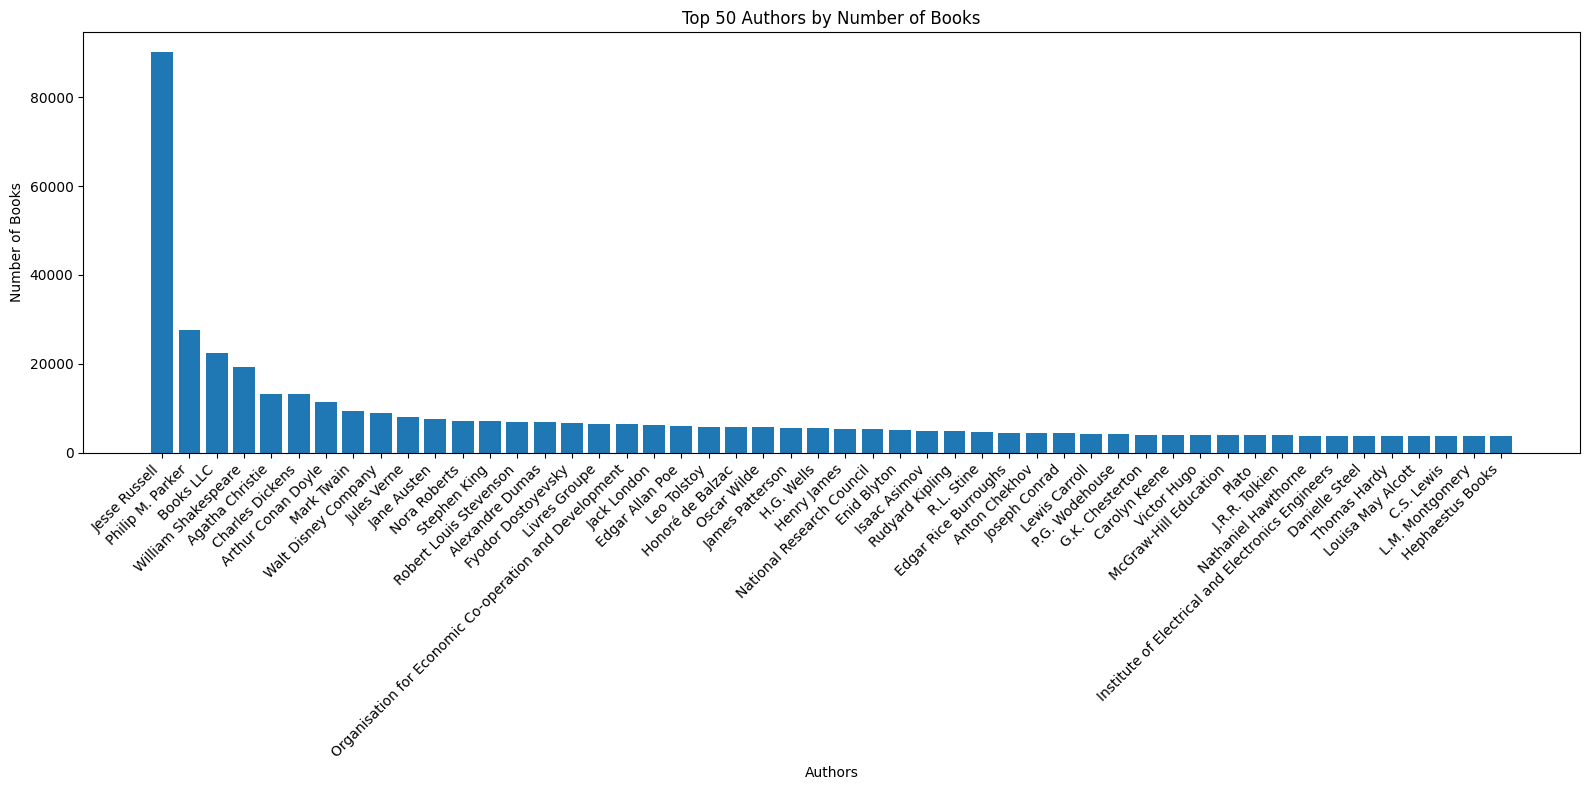

In [24]:

books_per_authors_descending = books["author_name"].value_counts().sort_values(ascending=False).reset_index()
books_per_authors_descending.columns = ['Author', 'Number of books']

authors_50 = books_per_authors_descending.head(50)
plt.figure(figsize=(16, 8))
plt.bar(authors_50["Author"], authors_50['Number of books'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Authors')
plt.ylabel('Number of Books')
plt.title('Top 50 Authors by Number of Books')
plt.tight_layout()
plt.show()

As we can see from the bar chart, Jesse Russell wrote the largest number of books, Philip M. Parker takes the second place, William Shakespeare takes the closing third place.

### [RQ2] 2. Which book has the highest number of reviews?

In [25]:
book_max_reviews = books.loc[books['text_reviews_count'] == books['text_reviews_count'].max()]['title'].values[0]
print('The book with the most number of reviews is', book_max_reviews)

The book with the most number of reviews is The Hunger Games (Hunger Games, #1)


### [RQ2] 3. Which are the top ten and ten worst books concerning the average score?

In [26]:
top_10_books = books.nlargest(10, 'average_rating')['title']

worst_10_books = books.nsmallest(10, 'average_rating')['title']

print("Top 10 Best Books Concerning the Average Score:")
print(top_10_books)

print("\nTop 10 Worst Books Concerning the Average Score:")
print(worst_10_books)

Top 10 Best Books Concerning the Average Score:
178     Later Letters of Edward Lear to Chichester For...
386                       Lord of the Flies Activity Pack
653                                            Bernie Mac
671     Delaware 1638-1776 (Voices from Colonial America)
721     Simply Italian: 100 Easy-To-Make, Zesty, Satis...
762                                      Rudolph Giuliani
1101             Singers, Heroes, and Gods in the Odyssey
1120    Fanaroff and Martin's Neonatal-Perinatal Medic...
1213                                     A Den Of Thieves
1252    Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...
Name: title, dtype: object

Top 10 Worst Books Concerning the Average Score:
526                                    A More Perfect Way
527                                        Fields of Gold
530                  Justitiemord: Fallet Keith Cederholm
570                       The Rain Falls Like Rain: Poems
571                       The Rain Falls Like Rain: Poems
654  

### [RQ2] 4. Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.

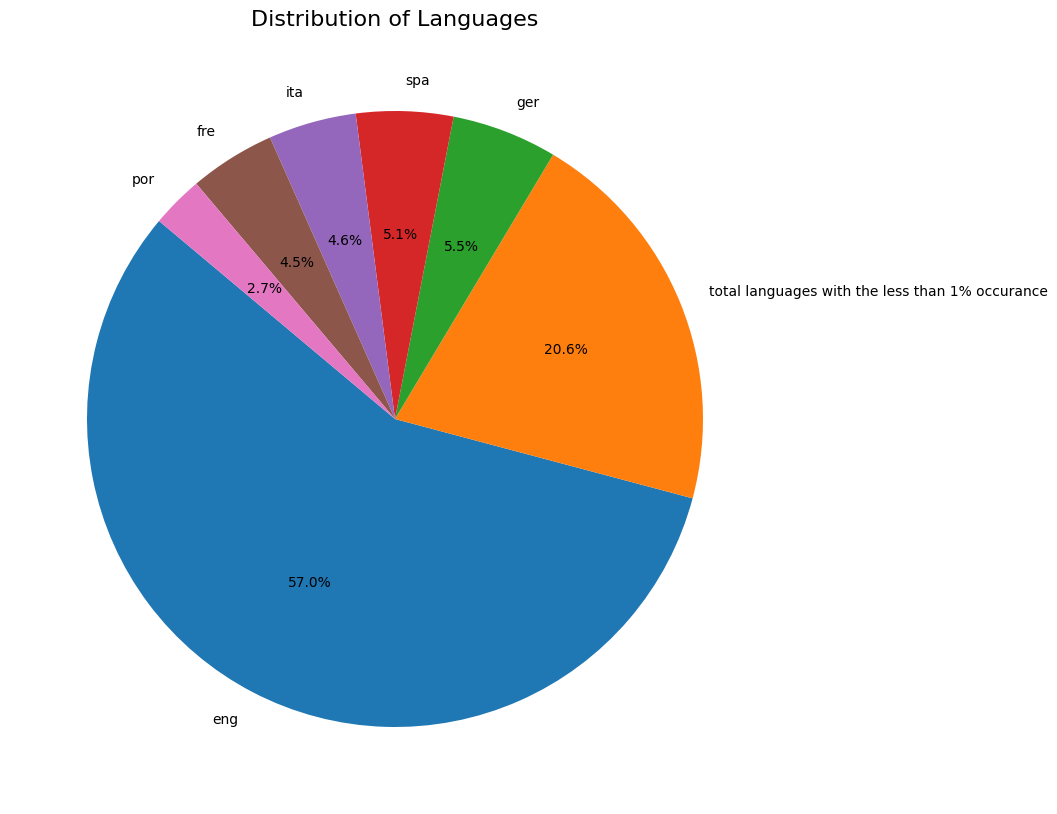

In [27]:
# Replacing en-gb, and en-us with the eng value, because the language is basically the same
books['language'] = books['language'].replace(r'^en.*', 'eng', regex=True)

threshold = 0.01 
# Counting the languages
language_distribution = books['language'].value_counts(normalize=True)

# Finding languages with the less than 1% distribution
other_languages = language_distribution[language_distribution < threshold].index

books.loc[books['language'].isin(other_languages), 'language'] = 'total languages with the less than 1% occurance'

# I dropped the empty values of the "language" feature 
books = books[books['language'] != '']

# Counting the values
language_counts = books['language'].value_counts()

# Visualization
plt.figure(figsize=(10, 10))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Languages', fontsize=16)
plt.show()

### [RQ2] 5. How many books have more than 250 pages?

In [28]:
books['num_pages'] = pd.to_numeric(books['num_pages'])
books_250_pages = books.loc[books['num_pages'] > 250]
print('The number of books containing more than 250 pages:', books_250_pages.shape[0])

The number of books containing more than 250 pages: 887053


### [RQ2] 6. Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books).

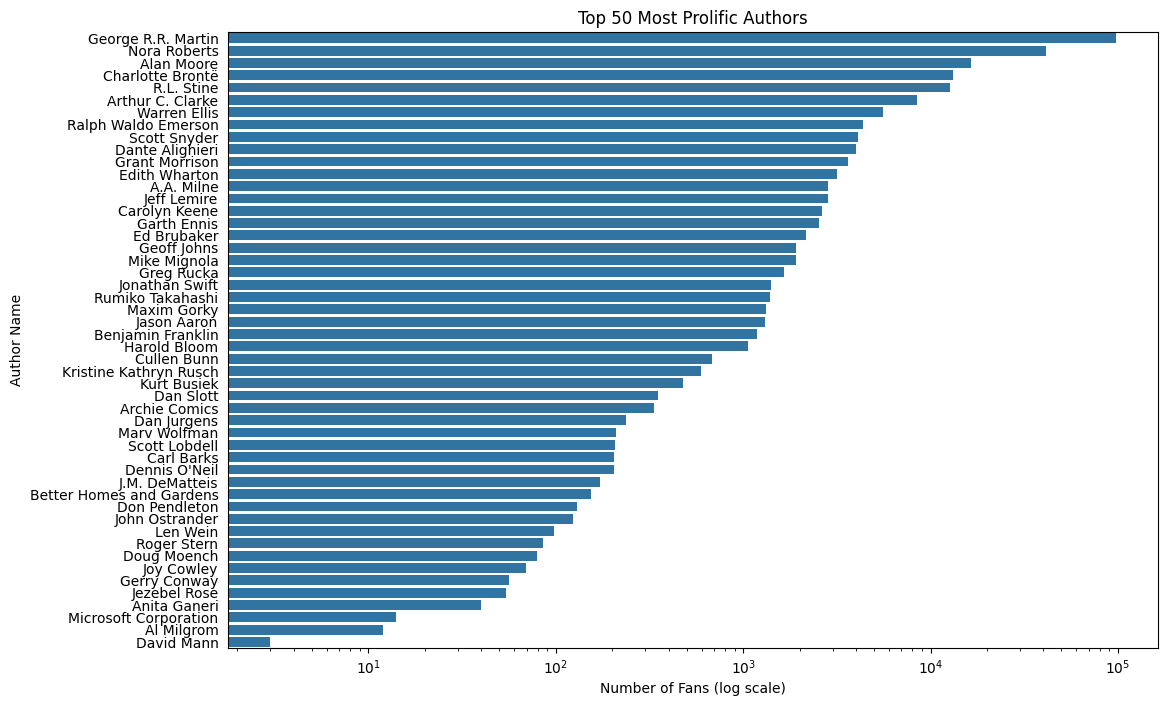

In [29]:
prolific_authors = authors.sort_values(by="works_count", ascending=False).head(50)
prolific_authors.sort_values(by="fans_count", inplace=True, ascending=False)

# Create a bar plot with seaborn for better aesthetics
plt.figure(figsize=(12, 8))
sns.barplot(x="fans_count", y="name", data=prolific_authors)

plt.xlabel('Number of Fans (log scale)')
plt.ylabel('Author Name')
plt.title('Top 50 Most Prolific Authors')
plt.tick_params(axis='y', which='both', left=False)
plt.yticks(range(len(prolific_authors)), prolific_authors['name'])
plt.xscale('log')
plt.show()

### [RQ3] Let’s have a historical look at the dataset!

* Write a function that takes as input a year and returns as output the following information:

The number of books published that year.

The total number of pages written that year.

The most prolific month of that year.

The longest book written that year.

* Use this function to build your data frame: the primary key will be a year, and the required information will be the attributes within the row. Finally, show the head and the tail of this new data frame considering the first ten years registered and the last ten years.

* Ask ChatGPT or any other LLM chatbot tool to implement this function and compare your work with the one the bot gave you as an answer. Does the chatbot implementation work? Please test it out and verify the correctness of the implementation, explaining the process you followed to prove it.



### [RQ3] 1. Write a function that takes as input a year and returns as output the following information:
* The number of books published that year.

* The total number of pages written that year.

* The most prolific month of that year.

* The longest book written that year.

### [RQ3] 2. Use this function to build your data frame: the primary key will be a year, and the required information will be the attributes within the row. Finally, show the head and the tail of this new data frame considering the first ten years registered and the last ten years.

### [RQ3] 3. Ask ChatGPT or any other LLM chatbot tool to implement this function and compare your work with the one the bot gave you as an answer. Does the chatbot implementation work? Please test it out and verify the correctness of the implementation, explaining the process you followed to prove it.


I used following ChatGPT prompt: 
I have a  book dataset with  these columns: ['id', 'title', 'authors', 'author_name', 'author_id', 'work_id', 'ratings_count', 'publication_date', 'original_publication_date', 'edition_information', 'num_pages']. Write a function that takes as input a year and returns following information as the output.
The number of books published that year.
* The total number of pages written that year (the column for the number of pages is called "num_pages")
* The most prolific month of that year.
* The longest book written that year.

In [30]:
def books_info_by_year(books_df, input_year):
    # Convert 'input_year' to string
    year_str = str(input_year)

    # Filter books for the specified year
    books_by_year = books_df[books_df['publication_date'].str.startswith(year_str)]

    if books_by_year.empty:
        return {
            'num_books': 0,
            'total_pages': 0,
            'most_prolific_month': '00',
            'longest_book': None
        }

    # Calculate the number of books published that year
    num_books = books_by_year.shape[0]

    # Filter out entries without a month value
    books_with_month = books_by_year.dropna(subset=['publication_date'])

    # Calculate the total number of pages written that year
    total_pages = books_by_year['num_pages'].sum()

    # Calculate the most prolific month
    # Extract month from 'publication_date' assuming date format is MM/DD/YYYY
    books_with_month['month'] = pd.to_datetime(books_with_month['publication_date'], errors='coerce').dt.month
    most_prolific_month = books_with_month['month'].mode().iloc[0] if not books_with_month.empty else '00'

    # Find the longest book written that year
    longest_book_title = books_by_year.loc[books_by_year['num_pages'].idxmax()]['title']

    return {
        'num_books': num_books,
        'total_pages': total_pages,
        'most_prolific_month': most_prolific_month,
        'longest_book': longest_book_title
    }

# Example usage:
# Assuming your dataset is named 'books'
year_info = books_info_by_year(books, 2022)
print(year_info)

{'num_books': 11, 'total_pages': 724.0, 'most_prolific_month': 1.0, 'longest_book': 'Weltgesellschaft: Raum - Kommunikation - Herrschaft'}


### [RQ4] Quirks questions about consistency. In most cases, we will not have a consistent dataset, and the one we are dealing with is no exception. So, let's enhance our analysis.

* You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?
* Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.
* What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?
* What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.

### [RQ4] 1.You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?

In [31]:
# Group by the 'name' column and count the number of unique authors for each name
authors_grouped = authors.groupby('name')['id'].agg(['size', 'unique']).reset_index()

# Filter for names that have more than one author (eponymous authors)
eponymous_authors = authors_grouped[authors_grouped['size'] > 1]

# Display the total number of eponymous authors
total_eponymous_authors = len(eponymous_authors)
print(f"Total Eponymous Authors: {total_eponymous_authors}")

# Display the eponymous authors along with their IDs
if not eponymous_authors.empty:
    print("\nEponymous Authors:")
    for index, row in eponymous_authors.iterrows():
        print(f"{row['name']}: {', '.join(map(str, row['unique']))}")
else:
    print("No eponymous authors found.")


Total Eponymous Authors: 37

Eponymous Authors:
Boris Zakhoder: 20971326, 8550578
Caroline Miller: 156110, 21011400
Catherine   Jones: 220670, 6537464
Chris Lynch: 100964, 20943108
Christopher Phillips: 64550, 5228945
Cicerón: 21233491, 15605873
David  Nelson: 21150368, 7277394
David Yates: 16824, 21110252
Dimitar Dimov: 20927213, 14241026
Erin  Bedford: 14548436, 16210686
George  Franklin: 19320302, 2782019
Hildegard von Bingen: 44326, 17059660
Jackson Butch Guice: 20625041, 4960064
James C.L. Carson: 7725538, 14278232
James Kent: 906249, 21148586
John  Mole: 3136330, 20942403
Jorge Molina: 17912372, 21148715
Joseph Fink: 2559520, 21150668
Julie  Campbell: 106829, 4481320
Katherine Mercurio Gotthardt: 3168647, 7485306
M.K. Graff: 3462044, 7778102
Martin    Shaw: 21221532, 6861778
Mike   Lee: 21018963, 5095632
Paul      Davies: 18708719, 21017065
Paul Graham: 23551, 20915191
Peter      Marshall: 21112791, 7277568
Peter    Green: 21106672, 13362163
Peter  Davies: 26880, 14205775
Peter  

### [RQ4] 2.Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.

In [32]:
def dictionary(authors, col_id, col_title, list_of_auth):
    grouped_data = authors.groupby(col_id)
    res = {auth: list(group[col_title].values) for auth, group in grouped_data if auth in list_of_auth}
    return res

### [RQ4] 3.What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?

In [33]:
# Sort authors by average rating and select the top 20 authors
top_20_authors = books.groupby('author_name')['average_rating'].mean().nlargest(20).index

# Filter books by the top 20 authors
books_top_20_authors = books[books['author_name'].isin(top_20_authors)]

# Find the longest book title among the books of the top 20 authors
longest_title_top_20_authors = books_top_20_authors.loc[books_top_20_authors['title'].str.len().idxmax()]['title']

# Find the longest book title overall
longest_title_overall = books.loc[books['title'].str.len().idxmax()]['title']

# Display the results
print(f"The longest book title among the books of the top 20 authors: {longest_title_top_20_authors}")
print(f"The longest book title overall: {longest_title_overall}")

The longest book title among the books of the top 20 authors: Self Publishing Simplified 2: Creating Ebooks For Kindle, Smashwords, Clickbank, and Your Own Ebook Store
The longest book title overall: Lecture on Human Happiness: Being the First of a Series of Lectures on That Subject in Which Will Be Comprehended a General Review of the Causes of the Existing Evils of Society [And a Development of Means by Which They May Be Permanently and Effectual...


### [RQ4] 4.What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.

In [34]:
shortest_title_overall = books.loc[books['title'].str.len().idxmin()]['title']

print(f"The shortest book title overall: {shortest_title_overall}")

The shortest book title overall: Q


As we can see, there are books in the dataset with no title at all, so I think we should select books with at least one character in the title.

In [35]:
books["title"] = books["title"].apply(lambda x: None if x == "" else x)

min_title_length = books["title"].str.len().min()

shortest_titles = books[books["title"].str.len() == min_title_length]

print("The list of books with the shortest titles:")
for index, row in shortest_titles.iterrows():
    print(f"- {row['title']}")

The list of books with the shortest titles:
- Q
- Q
- Q
- π
- K
- Q
- L
- Z
- V
- M
- Q
- Q
- Q
- Q
- Q
- M
- Q
- و
- M
- 卍
- L
- N
- ক
- 夜
- 3
- K
- K
- ن
- 雪
- 1
- ٧
- L
- K
- K
- M
- Q
- V
- 雪
- 7
- M
- 群
- 噓
- Q
- 洞
- Т
- 7
- 7
- C
- V
- Z
- &
- 洞
- Q
- Ó
- N
- C
- Ó
- X
- Q
- ও
- Z
- C
- 信
- K
- M
- M
- Q
- Q
- X
- 7
- H
- M
- C
- Q
- Q
- L
- X
- G
- C
- C
- A
- Q
- Q
- 뇌
- 岛
- 2
- 信
- Ζ
- M
- Y
- Y
- X
- U
- M
- X
- ณ
- B
- .
- 家
- Ζ
- B
- ن
- Z
- Y
- ع
- 1
- C
- Y
- Q
- Z
- C
- K
- I
- И
- Ζ
- 1
- 2
- Ё
- 蛙
- L
- Y
- C
- T
- H
- F
- Κ
- 秋
- 春
- 耻
- I
- 海
- D
- Z
- Y
- 3
- Ѝ
- T
- 睡
- C
- I
- K
- K
- Z
- 4
- A
- K
- 5
- Q
- 蛙
- Y
- K
- 7
- Z
- 5
- 4
- Y
- Ё
- Ё
- Ё
- O
- a
- F
- 9
- 家
- Q
- V
- X
- x
- Y
- Q
- 혀
- ณ
- F
- X
- F
- L
- 3
- 2
- Ю
- 熊
- I
- 3
- 翼
- C
- 顏
- Q
- 牠
- M
- 信
- 숲
- 牠
- Z
- 怪
- G
- F
- F
- 坟
- 侍
- 岛
- 渦
- 蛙
- 飘
- 雲
- 4
- 光
- 弟
- 坟
- Т
- 1
- У
- 1
- X
- ;
- X
- 잠
- Y
- F
- K
- X
- C
- x
- ঋ
- F
- F
- F
- ඈ
- M
- N
- F
- 6
- M
- E
- L
- A
- X
- J
- J
- Q
- N


### [RQ5] We can consider the authors with the most fans to be influential. Let’s have a deeper look.

* Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?

* Have they published any series of books? If any, extract the longest series name among these authors.

* How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it.

* Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.”

### [RQ5] 1. Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?

The top 10 most influential authors based on the number fo fans are:
Veronica Roth
Bill  Gates
Colleen Hoover
Rick Riordan
James Patterson
John Green
Neil deGrasse Tyson
Cassandra Clare
Mindy Kaling
Patrick Rothfuss


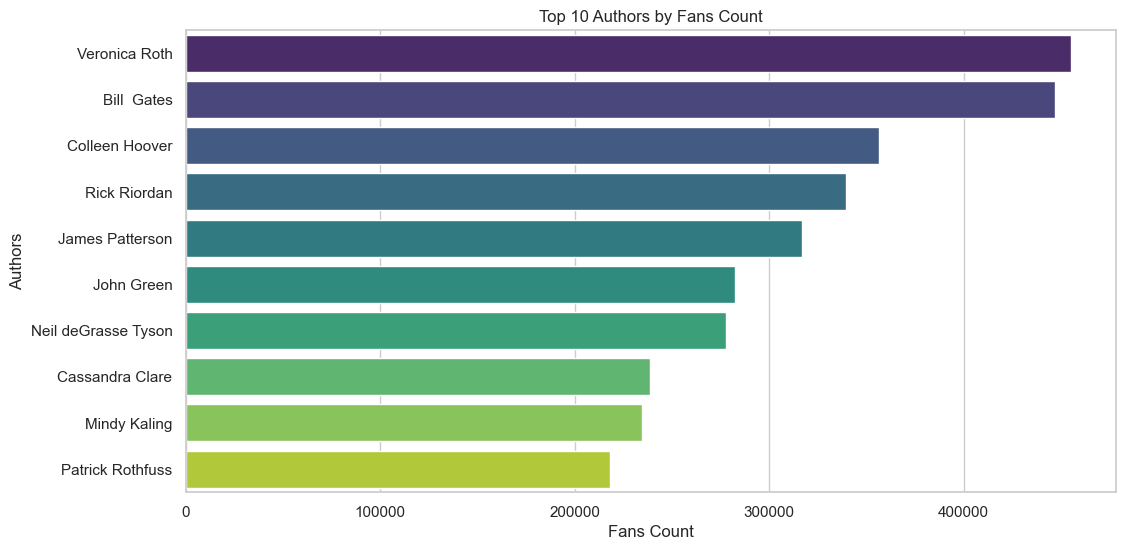

In [36]:
authors_copy = authors
top_10_authors_fans = authors_copy.nlargest(10, ['fans_count'])


print('The top 10 most influential authors based on the number fo fans are:')
for index, author in top_10_authors_fans.iterrows():
    print(author['name'])

# Set the style for Seaborn
sns.set(style="whitegrid")

# Visualization for 'fans_count'
plt.figure(figsize=(12, 6))
sns.barplot(x='fans_count', y='name', data=top_10_authors_fans, palette='viridis')
plt.title('Top 10 Authors by Fans Count')
plt.xlabel('Fans Count')
plt.ylabel('Authors')
plt.show()

The top 10 most influential authors based on the number of books are:
Garth Ennis
Geoff Johns
Gerry Conway
Marv Wolfman
Dan Jurgens
Rumiko Takahashi
Harold Bloom
Jason Aaron
Archie Comics
Grant Morrison


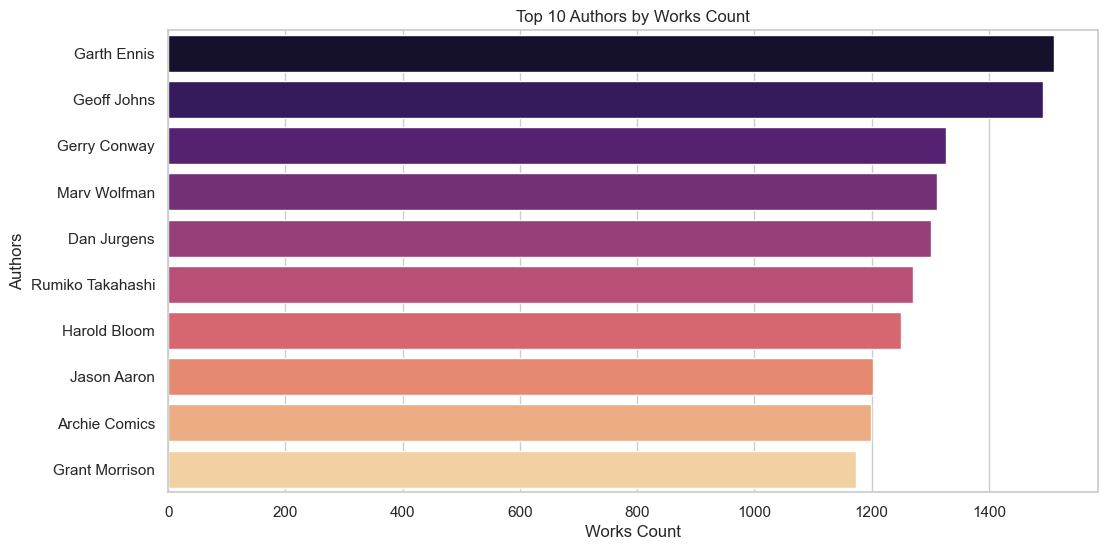

In [37]:
authors_copy = authors
top_10_authors_books = authors_copy.nlargest(10, ['works_count'])


print('The top 10 most influential authors based on the number of books are:')
for index, author in top_10_authors_books.iterrows():
    print(author['name'])

# Set the style for Seaborn
sns.set(style="whitegrid")

# Visualization for 'works_count'
plt.figure(figsize=(12, 6))
sns.barplot(x='works_count', y='name', data=top_10_authors_books, palette='magma')
plt.title('Top 10 Authors by Works Count')
plt.xlabel('Works Count')
plt.ylabel('Authors')
plt.show()

In [38]:
authors_copy['overall_influence'] = authors_copy['fans_count'] * authors_copy['works_count']

The top 10 most influential authors based on the number of fans and the number  of books are:
James Patterson
George R.R. Martin
Rick Riordan
J.K. Rowling
Cassandra Clare
Brandon Sanderson
Nora Roberts
Haruki Murakami
Diana Gabaldon
Nicholas Sparks


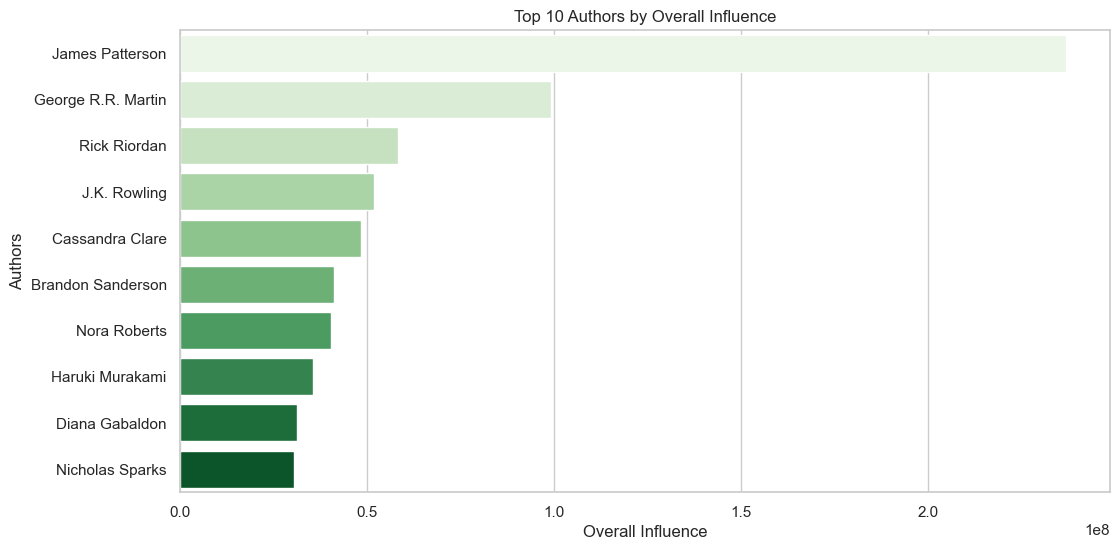

In [39]:
top_10_authors_overall=authors_copy.nlargest(10,'overall_influence')

print('The top 10 most influential authors based on the number of fans and the number  of books are:')
for index, author in top_10_authors_overall.iterrows():
    print(author['name'])

# Sort the DataFrame by overall influence
sorted_authors = authors_copy.sort_values(by='overall_influence', ascending=False)

sns.set(style="whitegrid")

# Visualization for 'works_count'
plt.figure(figsize=(12, 6))
sns.barplot(x='overall_influence', y='name', data=top_10_authors_overall, palette='Greens')
plt.title('Top 10 Authors by Overall Influence')
plt.xlabel('Overall Influence')
plt.ylabel('Authors')
plt.show()

For this question, I have compiled 3 different graphs to understand which author is the most influential author based on the number of fans, the number of books and both of these criteria, as we can see from the graphs above, the most influential author based on the number of fans is Veronica Roth. The most influential author in terms of the number of books is Garth Ennis. The most influential author in general is James Patterson.

### [RQ5] 2. Have they published any series of books? If any, extract the longest series name among these authors.

In [48]:
# Filter the top 10 most influential authors
top_10_authors_series = books.loc[books['author_name'].isin(top_10_authors_overall['name'])]

# Check if any of the authors have published a series
authors_with_series = top_10_authors_series[top_10_authors_series['series_name'].notnull()]

if not authors_with_series.empty:
    # Find the author with the longest series
    author_with_longest_series = authors_with_series.loc[authors_with_series['series_name'].apply(lambda x: len(str(x))) == max(authors_with_series['series_name'].apply(len))]
    
    # Extract the longest series name
    longest_series_name = author_with_longest_series['series_name'].iloc[0]
    
    print(f"The author with the longest series among the top 10 most influential authors is {author_with_longest_series['author_name'].iloc[0]}, and the series name is: {longest_series_name}")
else:
    print("None of the top 10 most influential authors have published any series.")

The author with the longest series among the top 10 most influential authors is George R.R. Martin, and the series name is: Game of Thrones / Das Lied von Eis und Feuer (Audible)


### [RQ5] 3. How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it.

### [RQ5] 4.Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.”

In [57]:
summary = top_10_authors_overall.groupby('gender')[['fans_count', 'average_rating', 'text_reviews_count']].agg(['mean', 'std', 'min', 'max'])
summary

fans_count                                   average_rating  \
                 mean            std      min       max           mean   
gender                                                                   
female  164740.500000   87582.167841  41402.0  238560.0       4.265000   
male    201767.333333  107979.658858  86123.0  339346.0       4.181667   

                             text_reviews_count                                 
             std   min   max               mean            std     min     max  
gender                                                                          
female  0.151987  4.09  4.46      328483.750000  225395.936540  127360  606373  
male    0.197019  3.96  4.38      249589.833333   78958.792016  167603  354145

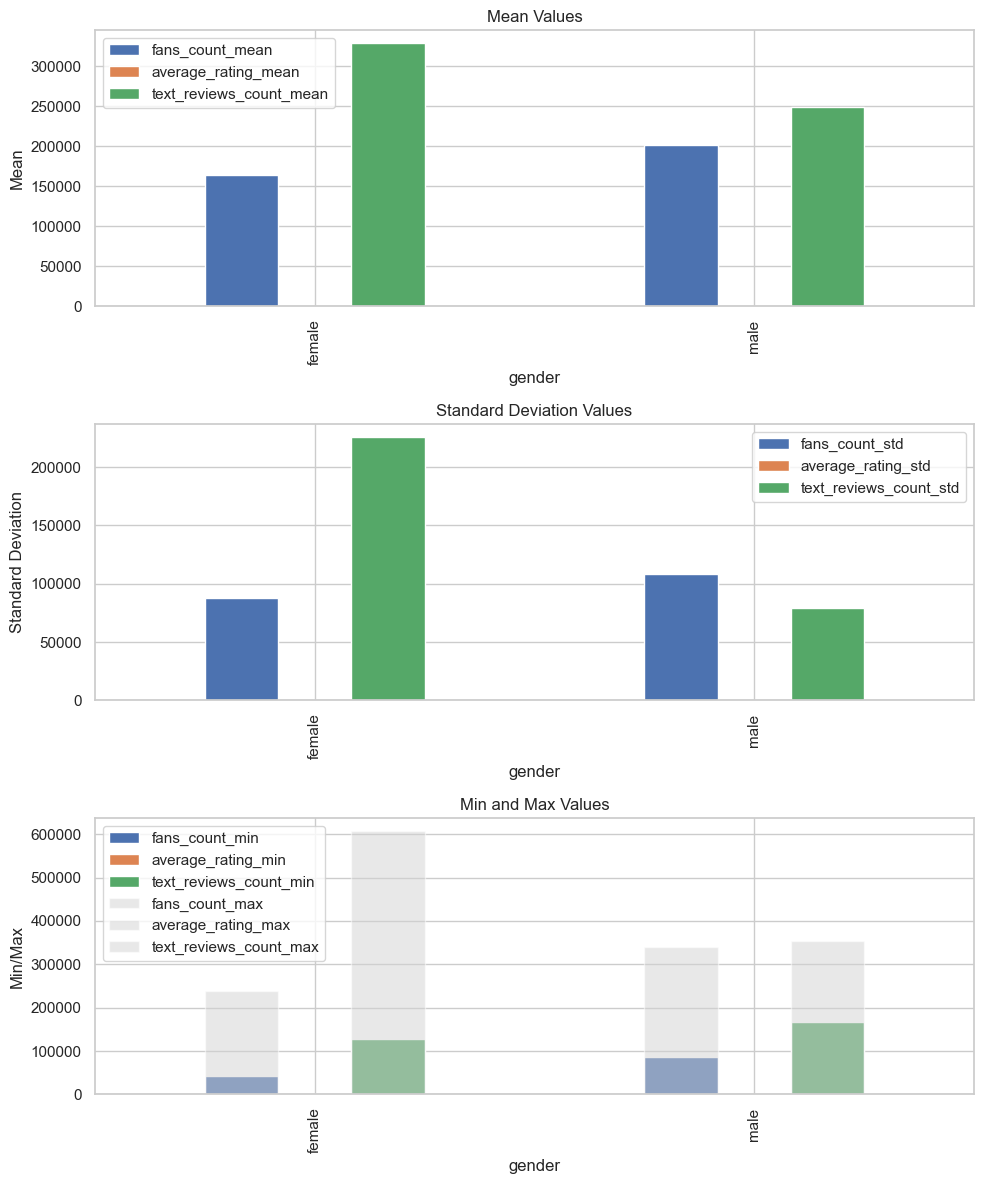

In [58]:
# Flatten the multi-index columns for easier plotting
summary.columns = ['_'.join(col).strip() for col in summary.columns.values]

# Create subplots for each summary metric
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Plotting mean values
summary.filter(like='mean').plot(kind='bar', ax=axes[0], title='Mean Values')
axes[0].set_ylabel('Mean')

# Plotting standard deviation values
summary.filter(like='std').plot(kind='bar', ax=axes[1], title='Standard Deviation Values')
axes[1].set_ylabel('Standard Deviation')

# Plotting min and max values
summary.filter(like='min').plot(kind='bar', ax=axes[2], title='Min and Max Values')
summary.filter(like='max').plot(kind='bar', ax=axes[2], color='lightgray', alpha=0.5)

axes[2].set_ylabel('Min/Max')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### [RQ6] For this question, consider the top 10 authors concerning the number of fans again.

* Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?
* For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?


### [RQ6] 1. Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?

### [RQ6] 2. For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?

### [RQ7] Estimating probabilities is a core skill for a data scientist: show us your best!

* Estimate the probability that a book has over 30% of the ratings above 4.
* Estimate the probability that an author publishes a new book within two years from its last work.
* In the file list.json, you will find a peculiar list named "The Worst Books of All Time." Estimate the probability of a book being included in this list, knowing it has more than 700 pages.
* Are the events X=’Being Included in The Worst Books of All Time list’ and Y=’Having more than 700 pages’ independent? Explain how you have obtained your answer.

### [RQ7] 1. Estimate the probability that a book has over 30% of the ratings above 4.

In [59]:

# Step 1: Create a new column indicating whether each rating is above 4
books['above_4'] = books['average_rating'] > 4

# Step 2: Calculate the percentage of ratings above 4 for each book
percentage = (books.groupby('title')['above_4'].sum() / books.groupby('title')['above_4'].count()) * 100

# Step 3: Estimate the probability that this percentage is over 30%
books_over_30 = percentage[percentage > 30].count()
total_books = percentage.count()

probability_over_30 = books_over_30 / total_books
print(f"Estimated probability that a book has over 30% of ratings above 4: {books_over_30 / total_books:.2%}")


Estimated probability that a book has over 30% of ratings above 4: 35.42%


### [RQ7] 2. Estimate the probability that an author publishes a new book within two years from its last work.

### [RQ7] 3. In the file list.json, you will find a peculiar list named "The Worst Books of All Time." Estimate the probability of a book being included in this list, knowing it has more than 700 pages.

### [RQ7] 4. Are the events X=’Being Included in The Worst Books of All Time list’ and Y=’Having more than 700 pages’ independent? Explain how you have obtained your answer.

### [RQ8] Charts, statistical tests, and analysis methods are splendid tools to illustrate your data-driven decisions to check whether a hypothesis is correct.

* Can you demonstrate that readers usually rate the longest books as the worst?
* Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?
* About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.
* It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit lazy. Confirm or reject this with a convenient statistical test or a predictive model.
* Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of these two tests.

### [RQ8] 1. Can you demonstrate that readers usually rate the longest books as the worst?

In [60]:
corr = books['average_rating'].corr(books['num_pages'])
print(corr)

-0.00026927291259966986


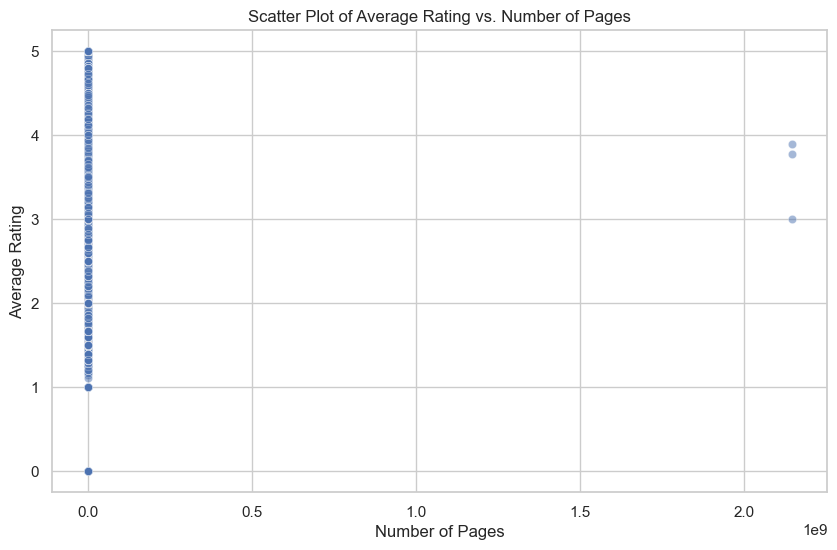

In [61]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_pages', y='average_rating', data=books, alpha=0.5)

plt.title('Scatter Plot of Average Rating vs. Number of Pages')
plt.xlabel('Number of Pages')
plt.ylabel('Average Rating')
plt.show()

The correlation coefficient between the 'average_rating' and 'num_pages' is approximately 0.0003. The correlation close to zero indicates that there is little to no linear relationship between these two variables.

### [RQ8] 2. Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?

### [RQ8] 3.About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.

### [RQ8] 4. It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit lazy. Confirm or reject this with a convenient statistical test or a predictive model.

In [62]:
# Drop the colums that we are not using in this analysis
df = authors[['fans_count', 'text_reviews_count']]
df = df.dropna()

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Perform linear regression using scikit-learn
X_train = train_data[['fans_count']]
y_train = train_data['text_reviews_count']
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
X_test = test_data[['fans_count']]
y_pred = model.predict(X_test)

# Print the results 
print(f"Coefficient for fans_count: {model.coef_[0]}")
correlation, p_value = pearsonr(df['fans_count'], df['text_reviews_count'])
print(f"Correlation between fans_count and text_reviews_count: {correlation}")
print(f"P-value: {p_value}")

Coefficient for fans_count: 1.1508587327613091
Correlation between fans_count and text_reviews_count: 0.6711875789929969
P-value: 0.0


As we can see from the results, there is a positive relationship between the number of fans an author has and the number of text reviews they receive.
The estimated increase in text reviews for a one-unit increase in fans is about 1.15.
The relationship is statistically significant, suggesting that the observed correlation is likely not due to random chance.

### [RQ8] 5.Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of these two tests.

# Introduction
 Statisctical tests play vital role in the data analyiss and mining. They provide a structured framework for drawingn meaningful insights from complex datasets. We shall examine the important role of statistical testing, which is particularly concerned with hypothesis design and how they can be applied to a complex choice from parameter tests to noneparametric test. In order to ensure the reliability and validity of results derived from data based research, it is important to understand why different types of tests are selected over each other.
#### Hypothesis Design:
 The formulation of hypotheses is a key element in any statistical analysis. The scientists must develop unambiguous, reliable hypotheses in order to begin the complexities of statistics testing. These hypotheses act as a guide to the analysis's trajectory. A precise research question, an examination of the content of available data, a clear understanding of the type of variables included incategorical or quantitative relationships and taking account of expectations from previous literature studies shall be key considerations for hypothesis development.
#### Parametric vs.Nonparametric Test.
 The choice between parametric and nonparametric tests is the next critical decision point as soon as hypotheses are established. The parameter tests are based on specific characteristics regarding the population distribution, typically taking into account normalisation and homogeneity of variance. On the other hand, nonparametric tests are free of distribution and make fewer assumptions about the population as a whole. A number of factors play a role in selecting these two approaches.
#### Normality of the Data:
 The normalisation of the data is one of the major considerations in choosing among parametric and nonparametric tests. Parametric tests, such as ttests or ANOVA, assume a normal distribution of data. parametric testing tends to be more robust and effective when the assumption of normality is met. However, a nonparametric test such as the Wilcoxon ranksum and KrukalsWallis tests would be more appropriate if there were not normally distributed data.
#### Scale of Measurement:
 Selection of statistical tests is also influenced by the scale of measurement at which the variables concerned are measured. Pursuant testing shall be used for the quantitative data with an interval or scale, whereas nonparametric tests may apply to ORDinal, intervals and ratios. The variables' characteristics lead researchers to a statistical test which is in line with this scale of measurement.
#### Sample Size:
 In the Decision Making Process, sample size considerations are of crucial importance. The robustness of parametric tests with larger sample sizes is often demonstrated and deviations from normalisation are less important. On the other hand, when compared to a sample size of fewer than 10 samples, notparametric tests may be more reliable and thus better suited for less or nonormally widespread data.
#### Assumptions of the Test:
 There's a set of assumptions in every statistics test. The precision of results can be compromised by violating the specific characteristics of population distribution that these parametric tests take into account. Nonparametric tests, being less restrictive, are often considered when assumptions of parametric tests cannot be met. The choice is therefore based on the capability to live up to these assumptions.
#### Nature of the Research Question:
 The choice between quantitative and noparametric tests depends, of course, on the nature of the research question. Parametric tests are preferable if the objective is to compare means or to assess relationships in a context where parametric assumptions are in place. On the contrary, nonparametric testing provides a viable alternative when confronted with skewed or obscured data or assumptions that are unfeasible.
#### Conclusion:
  In conclusion, the field of statistical testing in data analysis and mining is a multifaceted area with far broader implications for decision making as regards hypothesis development and test selection. To ensure that the selected test matches the characteristics of the data in question, a careful approach is taken to consider factors such as normality, scale of measurements, sampling size, assumptions and nature of the research question. As the evolution of data driven research continues, an understanding of statistical testing is still a necessary tool for identifying meaningful information and making informed decisions in today's complex field of data analysis and mining.